In [1]:
from pymilvus import Collection, connections
from RAG_Functions import *
import time
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import matplotlib.pyplot as plt
import numpy as np

/Users/fyli/CodingTools/anaconda3/envs/DE/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load models

In [2]:
# embedding model
embedding_model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")
input_text = "Does Apple prioritize the protection of user data?"

## Connect to Milvus collection 

In [3]:
connections.connect(host='localhost', port='19530')
collection_name = 'text_embeddings'
collection = Collection(name=collection_name)

## Index comparison

### IVF_FLAT

In [4]:
collection.release()
collection.drop_index()
index_params = {
    "metric_type": "L2",
    "index_type": "IVF_FLAT",
    "params": {"nlist": 128},
    "index_name": "embedding_index"
}
t0 = time.time()
collection.create_index(field_name="embedding", index_params=index_params)
print("Timing of creating index:")
print(time.time() - t0)
collection.load()

Timing of creating index:
15.342484951019287


In [5]:
# Get embedding of input
input_embedding = get_mixedbread_of_query(embedding_model, input_text)

# Start timing query
start_time = time.time()
# Top5 sentences
top5_sentences_IVF_FLAT = return_top_n_sentences(collection, input_embedding, 100)
# End timing query
end_time = time.time()

print(top5_sentences_IVF_FLAT)

(['Marvell: 5.', 'hinge: 15b.', 'BlaBlaCar: (xi) &nbsp.', 'InternetArchive: background: #333.\n}', 'InternetArchive: background: #333.\n}', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'EncyclopediaBritannica: Kim&nbsp.', 'PhilipMorrisInternational: for details).', 'BlaBlaCar: (xv) &nbsp.', 'Marvell: 4.&nbsp.', 'Marvell: 2.', 'Marvell: 1.', 'hinge: 15d.', 'Marvell: 7.&nbsp.', 'NationalGeographic: 5.', 'NationalGeographic: 5.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'WikiHow: A.', 'WikiHow: A.', 'WikiHow: A.', 'WikiHow: A.', 'WikiHow: A.', 'WikiHow: A.', 'Marvell: 2.&nbsp.', 'Marvell: 1.&nbsp.', 'Marvell: 8.&nbsp.', 'BlaBlaCar: (ix) &nbsp.', 'BlaBlaCar: (ix) &nbsp.', 'BlaBlaCar: (ix) &nbsp.', 'BlaBlaCar: (xii) &nbsp.', 'Discovery: NOTE:&nbsp.', 'Parler: ,B.', 'Indeed: This is detailed below.', 'USATODAY: A.', 'USATODAY: A.', 'BlaBlaC

### FLAT

In [6]:
collection.release()
collection.drop_index()
index_params = {
    "metric_type": "L2",
    "index_type": "FLAT",
    "index_name": "embedding_index"
}
t0 = time.time()
collection.create_index(field_name="embedding", index_params=index_params)
print("Timing of creating index:")
print(time.time() - t0)
collection.load()

Timing of creating index:
0.531386137008667


In [7]:
# Get embedding of input
input_embedding = get_mixedbread_of_query(embedding_model, input_text)

# Start timing query
start_time = time.time()
# Top5 sentences
top5_sentences_FLAT = return_top_n_sentences(collection, input_embedding, 100)
# End timing query
end_time = time.time()

print(top5_sentences_FLAT)

(['SCJohnson: T  to slu  ba je v  m bezplatn  .', 'SCJohnson: n  uda oma isikuandmete t    tlemise piiramist (  igus t    tlemise piiramisele).', 'SCJohnson: Na vy    d  n   a v souladu s pravidly   t  t   soukrom   v  m k takov  m informac  m poskytneme p    stup.', 'Marvell: 5.', 'SCJohnson: Teatud olukordades on v  imalik, et SC Johnson peab avalikustama isikuandmeid riigiasutuste seadusliku taotluse alusel, sealhulgas riikliku julgeoleku v  i   iguskaitsealaste n  uete t  itmiseks.', 'hinge: 15b.', 'BlaBlaCar: (xi) &nbsp.', 'InternetArchive: background: #333.\n}', 'InternetArchive: background: #333.\n}', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'EncyclopediaBritannica: Kim&nbsp.', 'PhilipMorrisInternational: for details).', 'BlaBlaCar: (xv) &nbsp.', 'SCJohnson: tehd   valitus asianmukaiselle valvontaviranomaiselle.', 'RT: In certain cases, e.g.', 'Marvell: 4.&nbsp.', 'SCJohnson: prawo do z  o  enia skargi do odpowie

### HNSW

In [8]:
collection.release()
collection.drop_index()
index_params = {
    "metric_type": "L2",
    "index_type": "HNSW",
    "params": {"M": 128, "efConstruction": 128},
    "index_name": "embedding_index"
}
t0 = time.time()
collection.create_index(field_name="embedding", index_params=index_params)
print("Timing of creating index:")
print(time.time() - t0)
collection.load()

Timing of creating index:
89.50472211837769


In [9]:
# Get embedding of input
input_embedding = get_mixedbread_of_query(embedding_model, input_text)

# Start timing query
start_time = time.time()
# Top5 sentences
top5_sentences_HNSW = return_top_n_sentences(collection, input_embedding, 100)
# End timing query
end_time = time.time()

print(top5_sentences_HNSW)

(['SCJohnson: T  to slu  ba je v  m bezplatn  .', 'SCJohnson: n  uda oma isikuandmete t    tlemise piiramist (  igus t    tlemise piiramisele).', 'SCJohnson: Na vy    d  n   a v souladu s pravidly   t  t   soukrom   v  m k takov  m informac  m poskytneme p    stup.', 'Marvell: 5.', 'SCJohnson: Teatud olukordades on v  imalik, et SC Johnson peab avalikustama isikuandmeid riigiasutuste seadusliku taotluse alusel, sealhulgas riikliku julgeoleku v  i   iguskaitsealaste n  uete t  itmiseks.', 'hinge: 15b.', 'BlaBlaCar: (xi) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'EncyclopediaBritannica: Kim&nbsp.', 'PhilipMorrisInternational: for details).', 'BlaBlaCar: (xv) &nbsp.', 'SCJohnson: tehd   valitus asianmukaiselle valvontaviranomaiselle.', 'RT: In certain cases, e.g.', 'Marvell: 4.&nbsp.', 'SCJohnson: prawo do z  o  enia skargi do odpowiednich w  adz ds.', 'Marvell: 2.', 'Marvell: 1.', 'SCJohnson: W PRZYPADKU WIEKU U  

### IVF_SQ8

In [10]:
collection.release()
collection.drop_index()
index_params = {
    "metric_type": "L2",
    "index_type": "IVF_SQ8",
    "params": {"nlist": 128},
    "index_name": "embedding_index"
}
t0 = time.time()
collection.create_index(field_name="embedding", index_params=index_params)
print("Timing of creating index:")
print(time.time() - t0)
collection.load()

In [11]:
# Get embedding of input
input_embedding = get_mixedbread_of_query(embedding_model, input_text)

# Start timing query
start_time = time.time()
# Top5 sentences
top5_sentences_IVF_SQ8 = return_top_n_sentences(collection, input_embedding, 100)
# End timing query
end_time = time.time()

print(top5_sentences_IVF_SQ8)

(['Marvell: 5.', 'hinge: 15b.', 'BlaBlaCar: (xi) &nbsp.', 'InternetArchive: background: #333.\n}', 'InternetArchive: background: #333.\n}', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'EncyclopediaBritannica: Kim&nbsp.', 'PhilipMorrisInternational: for details).', 'BlaBlaCar: (xv) &nbsp.', 'Marvell: 4.&nbsp.', 'Marvell: 1.', 'Marvell: 2.', 'Marvell: 7.&nbsp.', 'hinge: 15d.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'NationalGeographic: 5.', 'NationalGeographic: 5.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'WikiHow: A.', 'WikiHow: A.', 'WikiHow: A.', 'Marvell: 2.&nbsp.', 'WikiHow: A.', 'WikiHow: A.', 'WikiHow: A.', 'Marvell: 1.&nbsp.', 'Marvell: 8.&nbsp.', 'BlaBlaCar: (ix) &nbsp.', 'BlaBlaCar: (ix) &nbsp.', 'BlaBlaCar: (ix) &nbsp.', 'BlaBlaCar: (xii) &nbsp.', 'Parler: ,B.', 'Discovery: NOTE:&nbsp.', 'Indeed: This is detailed below.', 'BlaBlaCar: (iii) &nbsp.', 'BlaBlaCar: (

### SCANN

In [12]:
collection.release()
collection.drop_index()
index_params = {
    "metric_type": "L2",
    "index_type": "SCANN",
    "params": {"nlist": 128},
    "index_name": "embedding_index"
}
t0 = time.time()
collection.create_index(field_name="embedding", index_params=index_params)
print("Timing of creating index:")
print(time.time() - t0)
collection.load()

Timing of creating index:
30.00226092338562


In [13]:
# Get embedding of input
input_embedding = get_mixedbread_of_query(embedding_model, input_text)

# Start timing query
start_time = time.time()
# Top5 sentences
top5_sentences_SCANN = return_top_n_sentences(collection, input_embedding, 100)
# End timing query
end_time = time.time()

print(top5_sentences_SCANN)

(['Marvell: 5.', 'hinge: 15b.', 'BlaBlaCar: (xi) &nbsp.', 'InternetArchive: background: #333.\n}', 'InternetArchive: background: #333.\n}', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'PhilipMorrisInternational: for details).', 'BlaBlaCar: (xv) &nbsp.', 'Marvell: 4.&nbsp.', 'Marvell: 2.', 'Marvell: 1.', 'hinge: 15d.', 'Marvell: 7.&nbsp.', 'NationalGeographic: 5.', 'NationalGeographic: 5.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'BBC: a.', 'WikiHow: A.', 'WikiHow: A.', 'WikiHow: A.', 'WikiHow: A.', 'WikiHow: A.', 'WikiHow: A.', 'Marvell: 2.&nbsp.', 'Marvell: 1.&nbsp.', 'Marvell: 8.&nbsp.', 'BlaBlaCar: (ix) &nbsp.', 'BlaBlaCar: (ix) &nbsp.', 'BlaBlaCar: (ix) &nbsp.', 'BlaBlaCar: (xii) &nbsp.', 'USATODAY: A.', 'USATODAY: A.', 'BlaBlaCar: (iii) &nbsp.', 'BlaBlaCar: (iii) &nbsp.', 'BlaBlaCar: (iii) &nbsp.', 'BlaBlaCar: (iii) &nbsp.', 'BlaBlaCar: (

## Visualization

In [14]:
indexes = ['IVF_FLAT', 'FLAT', 'HNSW', 'IVF_SQ8', 'SCANN']
results = [top5_sentences_IVF_FLAT, top5_sentences_FLAT, top5_sentences_HNSW, top5_sentences_IVF_SQ8, top5_sentences_SCANN]
query_time = {}
distance = {}
for i, result in enumerate(results):
    query_time[indexes[i]] = result[3]
    distance[indexes[i]] = np.mean(result[2])
query_time

{'IVF_FLAT': 0.365537166595459,
 'FLAT': 0.8536992073059082,
 'HNSW': 0.1704866886138916,
 'IVF_SQ8': 0.3563418388366699,
 'SCANN': 0.3659970760345459}

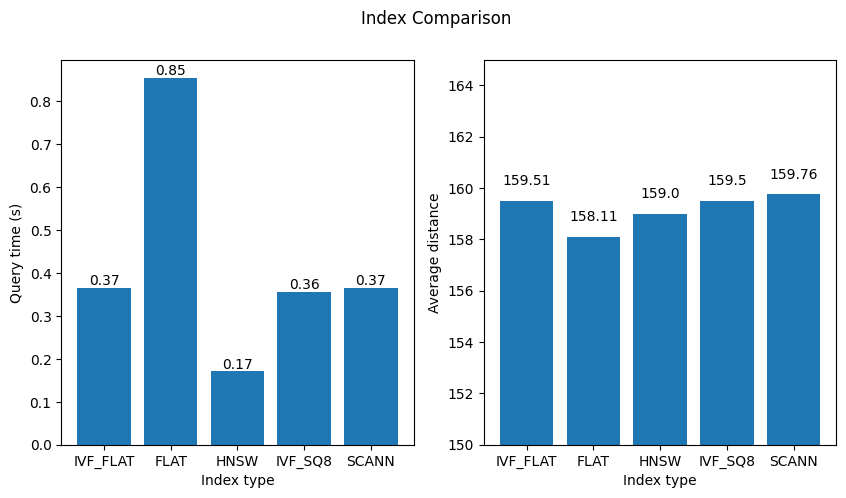

In [24]:
indexes = list(query_time.keys())
times = list(query_time.values())
distances = list(distance.values())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
bars1 = ax1.bar(indexes, times)
ax1.set_xlabel('Index type')
ax1.set_ylabel('Query time (s)')
for bar, value in zip(bars1, times):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value,2), ha='center', va='bottom')

bars2 = ax2.bar(indexes, distances)
ax2.set_ylim(150, 165)
ax2.set_xlabel('Index type')
ax2.set_ylabel('Average distance')
for bar, value in zip(bars2, distances):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, round(value,2), ha='center', va='bottom')

plt.suptitle('Index Comparison')
plt.show()